<a id="1"></a>
# **<center><span style="color:#fd7b12;">Introduction  </span></center>**

### In this project, I have to use a dataset on the performance of students in a school

<a id="2"></a>
# **<center><span style="color:#fd7b12;">Imports  </span></center>**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')

<a id="3"></a>
# **<center><span style="color:#fd7b12;"> Data Wrangling </span></center>**

In [2]:
data= pd.read_csv("student_data.csv")
df = data.copy()

In [3]:
df.sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
35,GP,F,15,U,GT3,T,2,3,other,other,...,3,5,1,1,1,5,0,8,7,6
233,GP,M,16,U,GT3,T,4,4,health,other,...,4,2,4,2,4,1,2,14,13,13
247,GP,M,22,U,GT3,T,3,1,services,services,...,5,4,5,5,5,1,16,6,8,8
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
376,MS,F,20,U,GT3,T,4,2,health,other,...,5,4,3,1,1,3,4,15,14,15


### Examination ot the data set

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

### we should have 2 genders in the dataset

In [5]:
df.sex.nunique()

2

### We have data about students, the logical thing is to have ana age of 25 years old 

In [6]:
df.age.max()

22

### Super!!! we should have the same categories on mothers and fathers education

In [7]:
df.Medu.unique()

array([4, 1, 3, 2, 0], dtype=int64)

In [8]:
df.Fedu.unique()

array([4, 1, 2, 3, 0], dtype=int64)

### We are gonna create a new variable for the mean exam grades

In [9]:
df['exam'] = (df['G1']+df['G2']+df['G3'])/3

### Another one for the verdict

In [10]:
df['verdict'] =0

In [11]:
for i in  df['exam'].index:
    if df['exam'][i] >=10:
        df['verdict'][i] =1;
    else:
        df['verdict'][i] = 0;

In [12]:
df.verdict.unique()

array([0, 1], dtype=int64)

### We don't have a lot of informations about a lout of valiables, we are gonne delete them

In [13]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'exam', 'verdict'],
      dtype='object')

In [14]:
df.drop(['address', 'Pstatus','reason',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout','Dalc',
       'Walc'], axis =1, inplace=True)

In [15]:
df.to_csv('dataset.csv')

<a id="4"></a>
# **<center><span style="color:#fd7b12;"> Exploratory Data Analysis </span></center>**

In [16]:
df.head()

,school,sex,age,famsize,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,health,absences,G1,G2,G3,exam,verdict
0,GP,F,18,GT3,4,4,at_home,teacher,mother,2,2,3,6,5,6,6,5.666667,0
1,GP,F,17,GT3,1,1,at_home,other,father,1,2,3,4,5,5,6,5.333333,0
2,GP,F,15,LE3,1,1,at_home,other,mother,1,2,3,10,7,8,10,8.333333,0
3,GP,F,15,GT3,4,2,health,services,mother,1,3,5,2,15,14,15,14.666667,1
4,GP,F,16,GT3,3,3,other,other,father,1,2,5,4,6,10,10,8.666667,0


### Set theme for visualization

In [17]:
sns.set_context("talk")
sns.set_style("whitegrid")
colors = sns.color_palette('tab10')

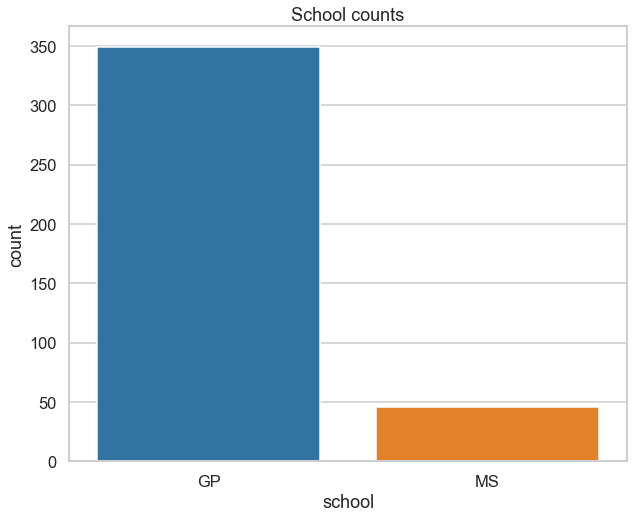

In [26]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='school')
plt.title('School counts')
plt.show()

More highschool students than university students

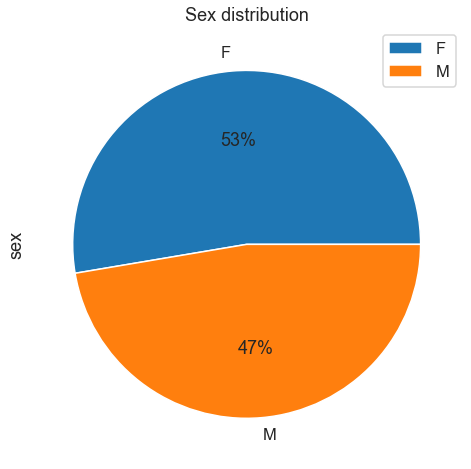

In [20]:
plt.figure(figsize=(10, 8))
df.sex.value_counts().plot.pie(autopct='%.0f%%')
plt.title('Sex distribution')
plt.legend()
plt.show()

we have slightly more female than male


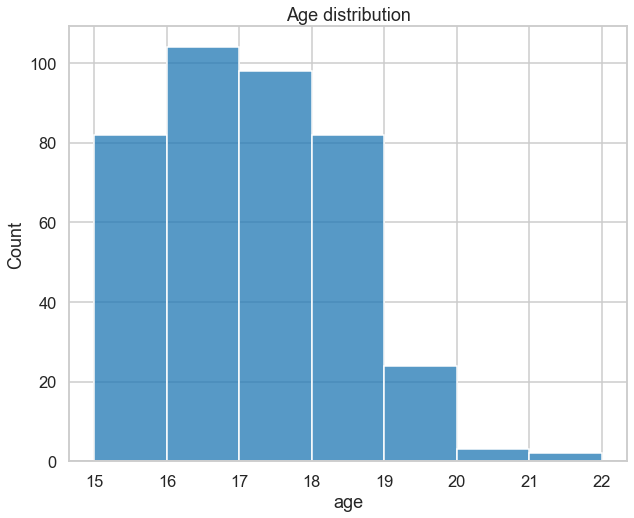

In [21]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='age', bins=7)
plt.title('Age distribution')
plt.show()

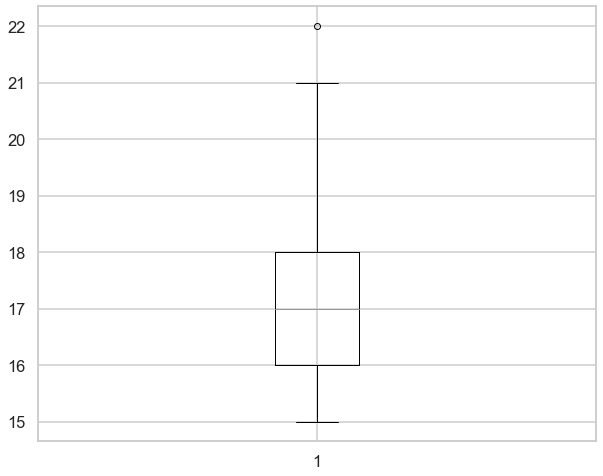

In [23]:
plt.figure(figsize=(10, 8))
plt.boxplot(df.age)
plt.show()

In [24]:
df.query('age == 22')

,school,sex,age,famsize,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,health,absences,G1,G2,G3,exam,verdict
247,GP,M,22,GT3,3,1,services,services,mother,1,1,1,16,6,8,8,7.333333,0


Most students are between 16yo and 18yo

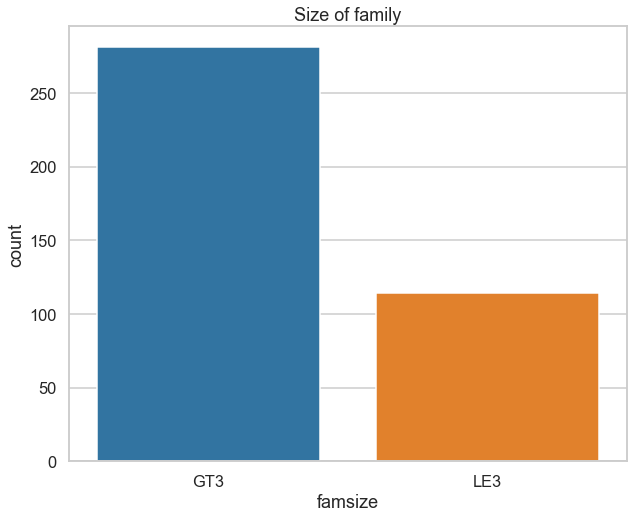

In [28]:
plt.figure(figsize=(10,8))
sns.countplot(data = df, x='famsize', palette = colors, order = df.famsize.value_counts().index)
plt.title('Size of family')
plt.show()

More students with big families than students with small families

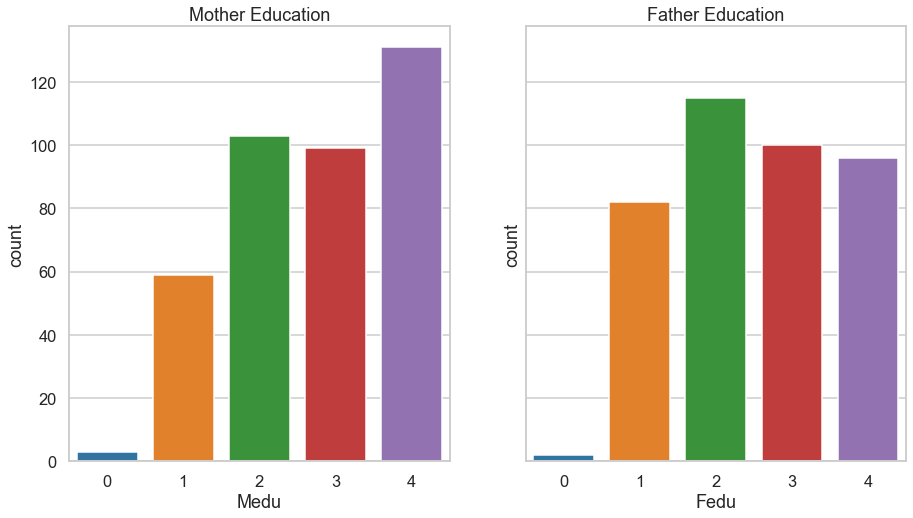

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8),sharey=True)

# Medu
sns.countplot(ax=axes[0], data = df, x='Medu', palette = colors)
axes[0].set_title('Mother Education')

# Fedu
sns.countplot(ax=axes[1], data = df, x='Fedu', palette = colors)
axes[1].set_title('Father Education')

plt.show()

Mothers are more educated than fathers 

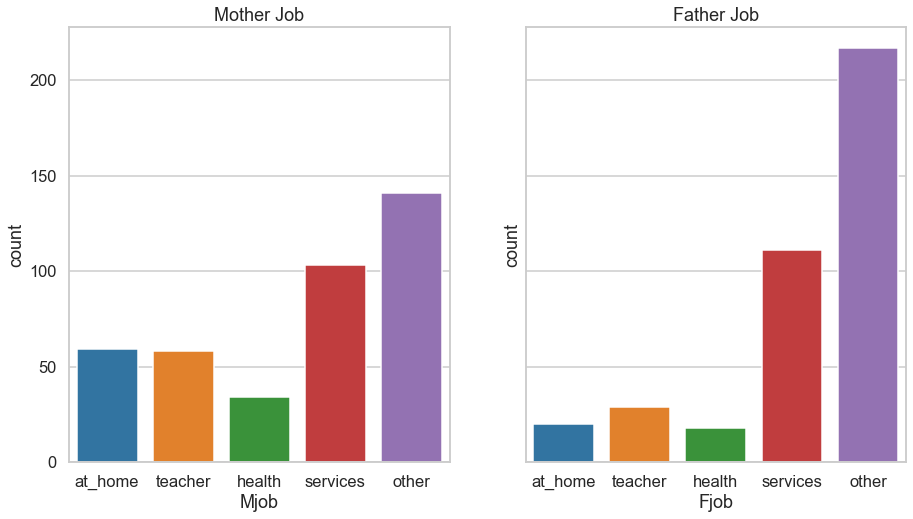

In [40]:

fig, axes = plt.subplots(1, 2, figsize=(15, 8),sharey=True)
order2 = ['at_home','teacher','health','services','other']

# Medu
sns.countplot(ax=axes[0], data = df, x='Mjob', palette = colors, order=order2)
axes[0].set_title('Mother Job')

# Fedu
sns.countplot(ax=axes[1], data = df, x='Fjob', palette = colors, order=order2)
axes[1].set_title('Father Job')

plt.show()

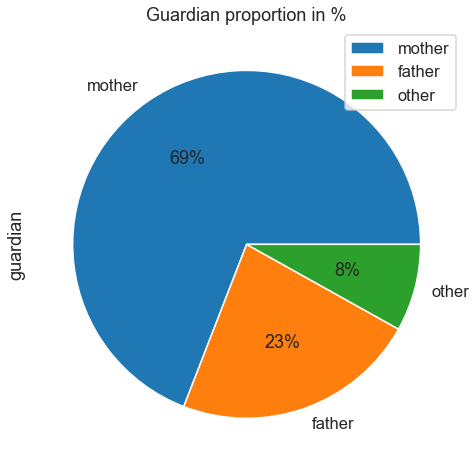

In [42]:
plt.figure(figsize=(10,8))
df.guardian.value_counts().plot(kind='pie', autopct='%.0f%%', colors = colors,)
plt.title('Guardian proportion in %')
plt.legend()
plt.show()

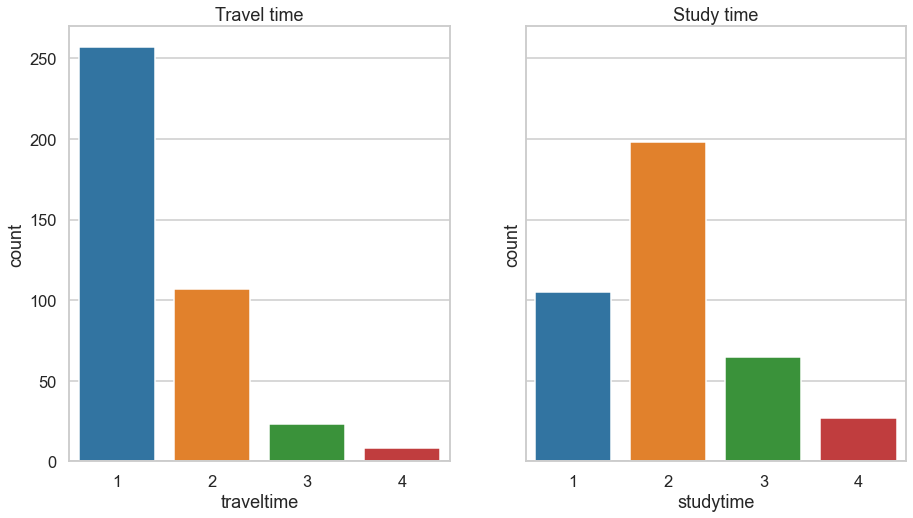

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=True)
order2 = [1,2,3,4]

# Mjob
sns.countplot(ax=axes[0], data = df, x='traveltime', palette = colors, order=order2)
axes[0].set_title('Travel time')

# Fjob
sns.countplot(ax=axes[1], data = df, x='studytime', palette = colors, order=order2)
axes[1].set_title('Study time')
plt.show()

**Study time** 
- 1/3 students don't study at all

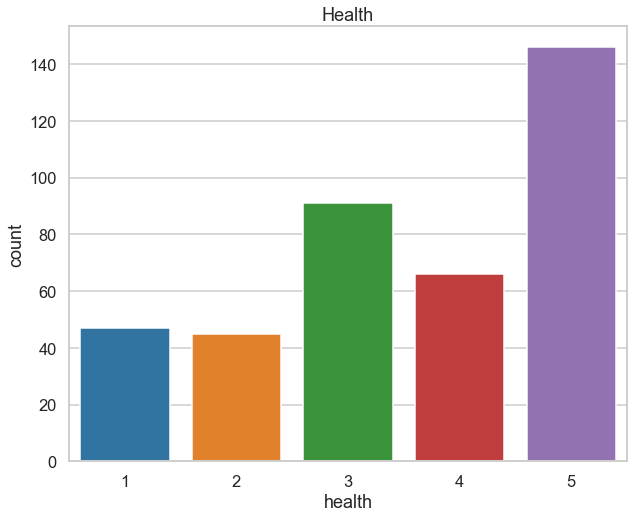

In [46]:
plt.figure(figsize=(10,8))
sns.countplot(data = df, x='health', palette = colors)
plt.title('Health')
plt.show()

Most students are healthy

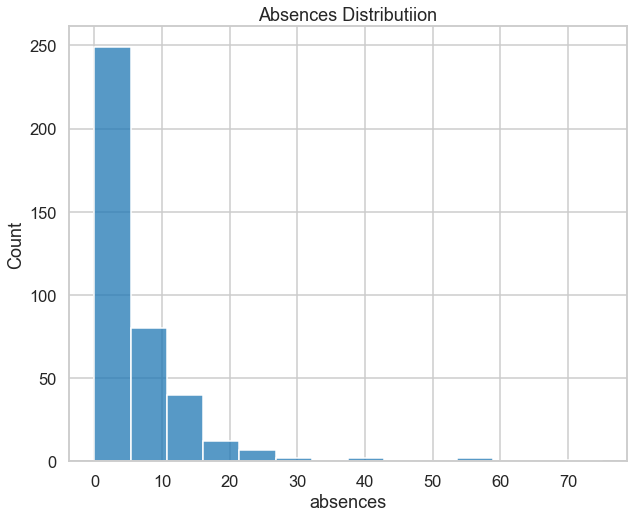

In [54]:
plt.figure(figsize=(10,8))
sns.histplot(data = df, x='absences', palette = colors, bins=14)
plt.title('Absences Distributiion')
plt.show()

In [52]:
# Bins choice
df.absences.describe()

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

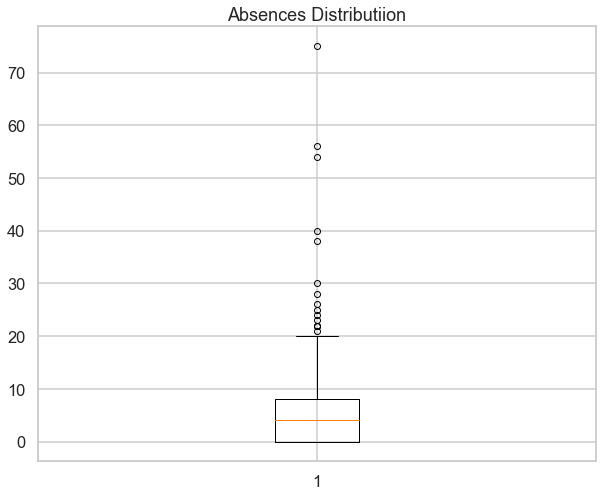

In [57]:
plt.figure(figsize=(10,8))
plt.boxplot(df.absences)
plt.title('Absences Distributiion')
plt.show()

In [58]:
df.head()

,school,sex,age,famsize,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,health,absences,G1,G2,G3,exam,verdict
0,GP,F,18,GT3,4,4,at_home,teacher,mother,2,2,3,6,5,6,6,5.666667,0
1,GP,F,17,GT3,1,1,at_home,other,father,1,2,3,4,5,5,6,5.333333,0
2,GP,F,15,LE3,1,1,at_home,other,mother,1,2,3,10,7,8,10,8.333333,0
3,GP,F,15,GT3,4,2,health,services,mother,1,3,5,2,15,14,15,14.666667,1
4,GP,F,16,GT3,3,3,other,other,father,1,2,5,4,6,10,10,8.666667,0


In [61]:
df.query('absences > 20').traveltime.mean()

1.5333333333333334

In [64]:
df.query('absences>20').health.mean()

3.1333333333333333

In [66]:
df.query('absences > 20').traveltime.describe()

count    15.000000
mean      1.533333
std       0.516398
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       2.000000
Name: traveltime, dtype: float64

In [67]:
df.query('absences>20').health.describe()

count    15.000000
mean      3.133333
std       1.597617
min       1.000000
25%       2.000000
50%       3.000000
75%       5.000000
max       5.000000
Name: health, dtype: float64

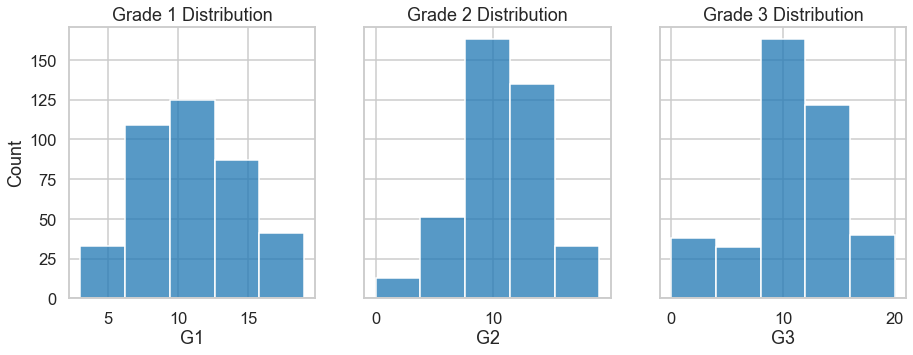

In [69]:
fig, axes = plt.subplots(1, 3, figsize=(15,5),sharey=True)

# G1
sns.histplot(ax=axes[0], data = df, x='G1', palette = colors, bins = 5)
axes[0].set_title('Grade 1 Distribution')

# G2
sns.histplot(ax=axes[1], data = df, x='G2', palette = colors, bins = 5)
axes[1].set_title('Grade 2 Distribution')

# G3
sns.histplot(ax=axes[2], data = df, x='G3', palette = colors, bins = 5)
axes[2].set_title('Grade 3 Distribution')
plt.show()

In [70]:
df.G1.describe()

count    395.000000
mean      10.908861
std        3.319195
min        3.000000
25%        8.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: G1, dtype: float64

In [71]:
df.G2.describe()

count    395.000000
mean      10.713924
std        3.761505
min        0.000000
25%        9.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: G2, dtype: float64

In [72]:
df.G3.describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

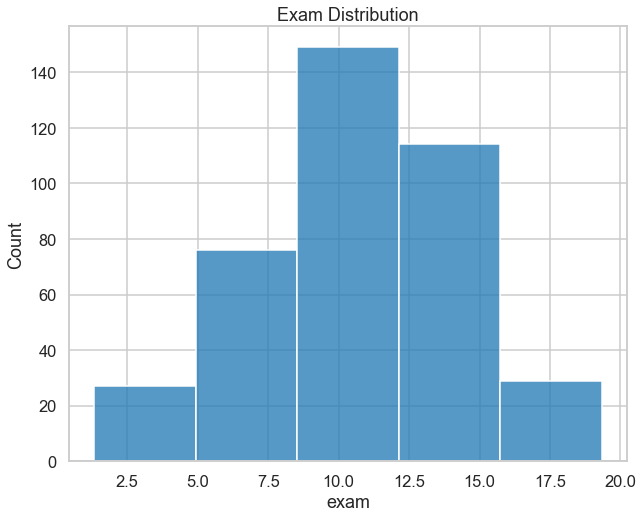

In [75]:
plt.figure(figsize=(10,8))
sns.histplot(data = df, x='exam', palette = colors, bins= 5)
plt.title('Exam Distribution')
plt.show()

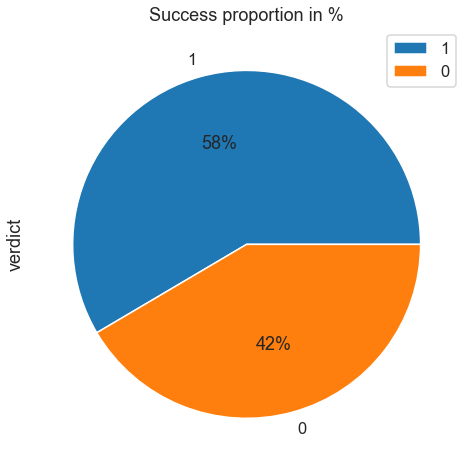

In [76]:
plt.figure(figsize=(10,8))
df.verdict.value_counts().plot(kind='pie', autopct='%.0f%%', colors = colors)
plt.title('Success proportion in %')
plt.legend()
plt.show()

# Bivariate

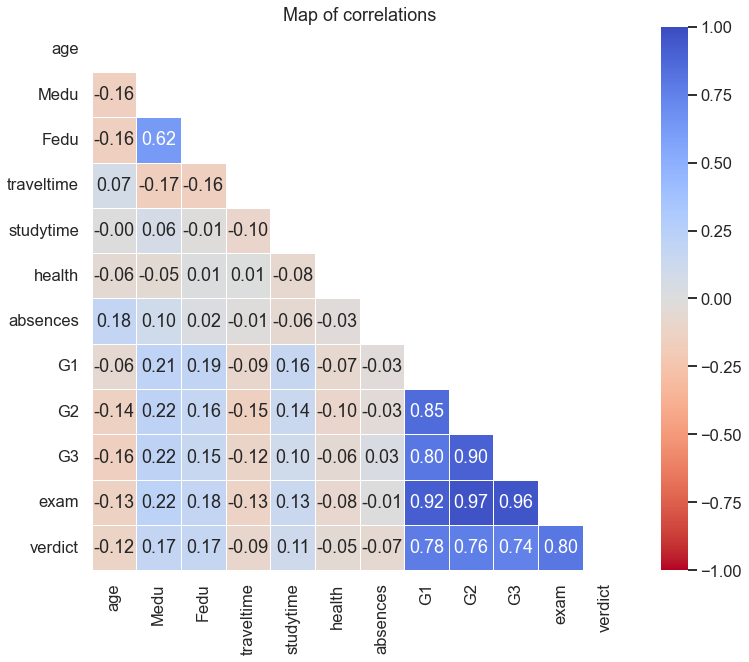

In [77]:
plt.figure(figsize = (12,10))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask=mask, center=0, cmap='coolwarm_r', linewidths=1, annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.title('Map of correlations')
plt.show()

In [78]:
df_success = df.query('verdict==1')
df_success.sample(3)

,school,sex,age,famsize,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,health,absences,G1,G2,G3,exam,verdict
194,GP,M,16,GT3,2,3,other,other,father,2,1,3,0,13,14,14,13.666667,1
120,GP,F,15,GT3,1,2,at_home,services,mother,1,2,1,2,16,15,15,15.333333,1
229,GP,F,17,GT3,2,1,other,other,mother,2,3,3,10,12,10,12,11.333333,1


In [89]:
df_Msex = df.query('sex=="M"').sample(187)
df_Fsex = df.query('sex=="F"').sample(187)
df_sex = df_Msex.append(df_Fsex)

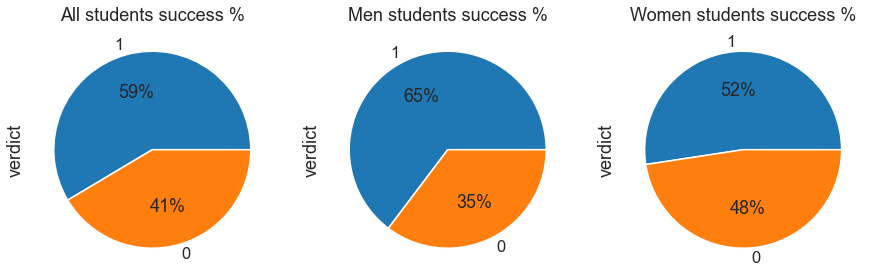

In [91]:
fig, axes = plt.subplots(1,3, figsize=(15,8))

#sex
df_sex.verdict.value_counts().plot(ax=axes[0],kind='pie',colors=colors, autopct='%.0f%%')
axes[0].set_title('All students success %')

#Msex
df_Msex.verdict.value_counts().plot(ax=axes[1], kind='pie',colors=colors, autopct='%.0f%%')
axes[1].set_title('Men students success %')

#Fex
df_Fsex.verdict.value_counts().plot(ax=axes[2], kind='pie',colors=colors, autopct='%.0f%%')
axes[2].set_title('Women students success %')
plt.show()

In [83]:
print(f'La probabilité qu\'une personne réussisse et s\'il s\'agit d\'un homme est : {df.verdict.mean()*df_Msex.verdict.mean()}')
print(f'La probabilité qu\'une personne réussisse et s\'il s\'agit d\'une femme est: {df.verdict.mean()*df_Fsex.verdict.mean()}')


La probabilité qu'une personne réussisse et s'il s'agit d'un homme est : 0.3784065524944155
La probabilité qu'une personne réussisse et s'il s'agit d'une femme est: 0.30647803425167536


### Enfin je vais faire un test de statistiques (t-test) avec :
- Ho = Les hommes et les femmes ont les mêmes chances de réussir
- H1 = Les hommes ont plus de chances de réussir que les femmes


In [92]:
stats.ttest_ind(df_Msex.verdict, df_Fsex.verdict)

Ttest_indResult(statistic=2.426733440805161, pvalue=0.015709787480999264)

Text(0.5, 1.0, 'Age influence to exam score')

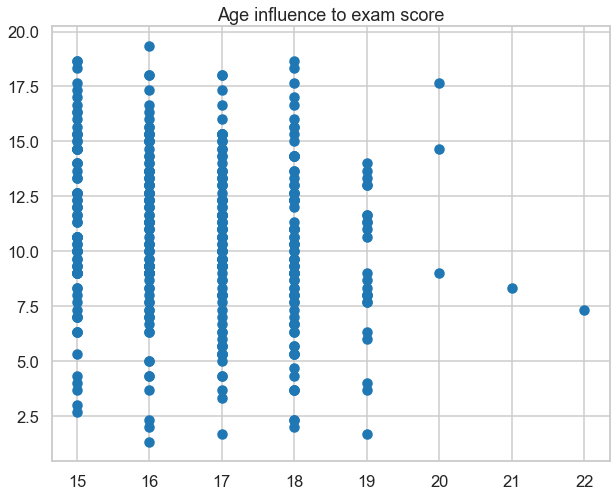

In [96]:
plt.figure(figsize=(10,8))
plt.scatter( x=df.age, y=df.exam)
plt.title('Age influence to exam score')

In [97]:
df_age_exam1 = pd.DataFrame([df.query('age==15').exam.mean(),df.query('age==16').exam.mean(),
                            df.query('age==17').exam.mean(),df.query('age==18').exam.mean(),
                            df.query('age==19').exam.mean(),df.query('age==20').exam.mean(),
                            df.query('age==21').exam.mean(),df.query('age==22').exam.mean(),
                            ],columns=['mscore'],index=[15,16,17,18,19,20,21,22])


df_age_exam2 = pd.DataFrame([df.query('age==15').exam.median(),df.query('age==16').exam.median(),
                            df.query('age==17').exam.median(),df.query('age==18').exam.median(),
                            df.query('age==19').exam.median(),df.query('age==20').exam.median(),
                            df.query('age==21').exam.median(),df.query('age==22').exam.median(),
                            ],columns=['mscore'],index=[15,16,17,18,19,20,21,22])


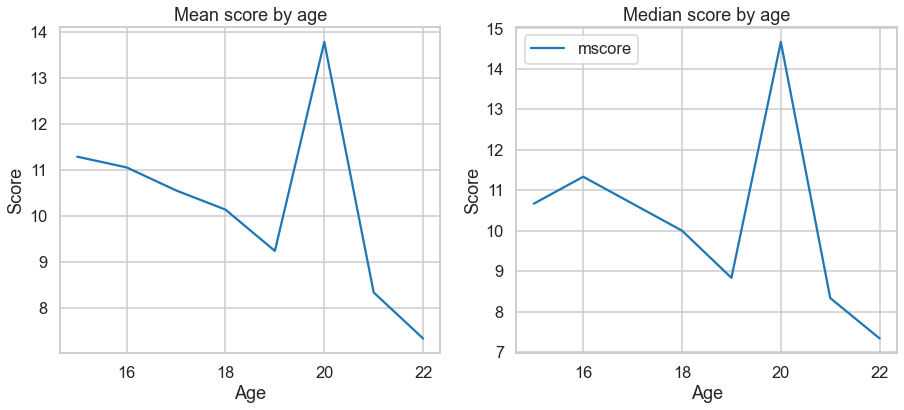

In [100]:
fig, axes =plt.subplots(1,2, figsize=([15,6]))

#mean
df_age_exam1.mscore.plot(ax=axes[0])
axes[0].set_title('Mean score by age')

axes[0].set_ylabel('Score')
axes[0].set_xlabel('Age')

#median
df_age_exam2.plot(ax=axes[1])
axes[1].set_title('Median score by age')
axes[1].set_ylabel('Score')
axes[1].set_xlabel('Age')
plt.show()

In [103]:
df.query('age > 20')

,school,sex,age,famsize,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,health,absences,G1,G2,G3,exam,verdict
247,GP,M,22,GT3,3,1,services,services,mother,1,1,1,16,6,8,8,7.333333,0
392,MS,M,21,GT3,1,1,other,other,other,1,1,3,3,10,8,7,8.333333,0


In [104]:
df.age.value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

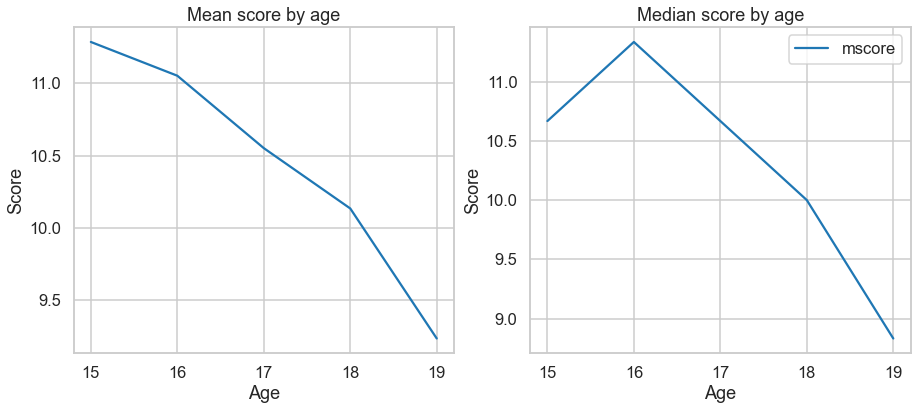

In [102]:
df_age_exam1 = pd.DataFrame([df.query('age==15').exam.mean(),df.query('age==16').exam.mean(),
                            df.query('age==17').exam.mean(),df.query('age==18').exam.mean(),
                            df.query('age==19').exam.mean()
                            ],columns=['mscore'],index=[15,16,17,18,19])


df_age_exam2 = pd.DataFrame([df.query('age==15').exam.median(),df.query('age==16').exam.median(),
                            df.query('age==17').exam.median(),df.query('age==18').exam.median(),
                            df.query('age==19').exam.median()
                            ],columns=['mscore'],index=[15,16,17,18,19])

fig, axes =plt.subplots(1,2, figsize=([15,6]))

#mean
df_age_exam1.mscore.plot(ax=axes[0])
axes[0].set_title('Mean score by age')
axes[0].set_ylabel('Score')
axes[0].set_xlabel('Age')

#median
df_age_exam2.plot(ax=axes[1])
axes[1].set_title('Median score by age')
axes[1].set_ylabel('Score')
axes[1].set_xlabel('Age')
plt.show()